In [7]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

import random

import psycopg2
#from config import config
from configparser import ConfigParser

In [4]:
# Weekend TODO

# implement team/g - oppenent/g 

# try to normalize by season / playoffs

# Do some visualization to map league trends

# Look into how often sportbooks accurately predict the winner

In [6]:
def config(filename = 'db/database.ini', section = 'postgresql'):
    parser = ConfigParser()
    parser.read(filename)

    db = {}

    if parser.has_section(section):
        params = parser.items(section)

        for param in params:
            db[param[0]] = param[1]

    else:
        raise Exception('Section{0} is not found in the {1} file'.format(section, filename))
    
    return(db)

config()

Exception: Sectionpostgresql is not found in the db/database.ini file

In [63]:
game_results_columns = ['id',
    'visitor',
    'home',
    'dates',
    'visitor_score',
    'home_score']

yearly_team_stats_columns = ['id',
    'player',
    'mp', 
    'fg', 
    'fga', 
    'fg_pct', 
    'fg3', 
    'fg3a', 
    'fg3_pct',
    'fg2', 
    'fg2a', 
    'fg2_pct', 
    'ft', 
    'fta', 
    'ft_pct', 
    'orb', 
    'drb', 
    'trb',
    'ast', 
    'stl', 
    'blk', 
    'tov', 
    'pf', 
    'pts', 
    'team', 
    'year']

yearly_opponent_stats_columns = ['id',
    'player',
    'mp', 
    'fg', 
    'fga', 
    'fg_pct', 
    'fg3', 
    'fg3a', 
    'fg3_pct',
    'fg2', 
    'fg2a', 
    'fg2_pct', 
    'ft', 
    'fta', 
    'ft_pct', 
    'orb', 
    'drb', 
    'trb',
    'ast', 
    'stl', 
    'blk', 
    'tov', 
    'pf', 
    'pts', 
    'team', 
    'year']

In [64]:
def sql_to_dataframe(conn, query, column_names):
   cursor = conn.cursor()
   try:
      cursor.execute(query)
      tuples_list = cursor.fetchall()
      cursor.close()
      df = pd.DataFrame(tuples_list, columns=column_names)
      return df
   except (Exception, psycopg2.DatabaseError) as error:
      print("Error: " + str(error))
      cursor.close()
      return 1


In [65]:
#game_results_sql_df = pd.DataFrame()

In [66]:
def connect(query, columns):
    connection = None
    try:
        params = config()
        #print(params)
        print('connecting to postgresql database...')
        connection = psycopg2.connect(**params)
       
        # create cursor
        cursor = connection.cursor()
      

        try:
            df = sql_to_dataframe(connection, query, columns)
 
            print("df created")
            return df

            
        except (Exception, psycopg2.DatabaseError) as error:
            #os.remove(tmp_df)
            print("Error: %s" % error)
            connection.rollback()
            cursor.close()
            return 1
    
    except(Exception, psycopg2.DatabaseError) as error:
        print(error)
    
    finally:
        if connection is not None:
            connection.close()
            print('database connection terminated')

if __name__ == '__main__':
    game_results_sql_df = connect('select * from game_results', game_results_columns)
    team_stats_sql_df = connect('select * from yearly_team_per_game_stats', yearly_team_stats_columns)
    opponent_stats_sql_df = connect('select * from yearly_opponent_per_game_stats', yearly_opponent_stats_columns)

connecting to postgresql database...
df created
database connection terminated
connecting to postgresql database...
df created
database connection terminated
connecting to postgresql database...
df created
database connection terminated


In [67]:
game_results_sql_df

,id,visitor,home,dates,visitor_score,home_score
0,PHIBOS20221018,PHI,BOS,20221018,117,126
1,LALGSW20221018,LAL,GSW,20221018,109,123
2,ORLDET20221019,ORL,DET,20221019,109,113
3,WASIND20221019,WAS,IND,20221019,114,107
4,HOUATL20221019,HOU,ATL,20221019,107,117
...,...,...,...,...,...,...
12994,MIASAS20140605,MIA,SAS,20140605,95,110
12995,MIASAS20140608,MIA,SAS,20140608,98,96
12996,SASMIA20140610,SAS,MIA,20140610,111,92
12997,SASMIA20140612,SAS,MIA,20140612,107,86


In [68]:
team_stats_sql_df

,id,player,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,fg2,...,drb,trb,ast,stl,blk,tov,pf,pts,team,year
0,TOR2014,Team/G,243.4,36.5,81.9,0.445,8.7,23.4,0.372,27.8,...,31.1,42.5,21.2,7.0,4.2,14.1,23.0,101.3,TOR,2014
1,TOR2015,Team/G,242.1,37.9,83.3,0.455,8.9,25.1,0.352,29.0,...,30.8,41.5,20.7,7.5,4.4,12.9,20.9,104.0,TOR,2015
2,BOS2014,Team/G,240.6,36.5,83.9,0.435,7.0,21.1,0.333,29.5,...,30.5,42.5,21.0,7.1,4.2,15.4,21.3,96.2,BOS,2014
3,BOS2015,Team/G,242.4,38.9,87.9,0.443,8.0,24.6,0.327,30.9,...,32.7,43.8,24.5,8.2,3.6,13.8,21.2,101.4,BOS,2015
4,NYK2014,Team/G,242.1,36.9,82.2,0.449,9.3,24.9,0.372,27.7,...,29.7,40.3,20.0,7.7,4.5,13.0,22.1,98.6,NYK,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,HOU2023,Team/G,240.9,40.6,88.9,0.457,10.4,31.9,0.327,30.2,...,32.9,46.3,22.4,7.3,4.6,16.2,20.5,110.7,HOU,2023
295,NOP2020,Team/G,242.1,42.6,91.6,0.465,13.6,36.9,0.370,28.9,...,35.4,46.5,26.8,7.5,5.0,16.4,21.2,115.8,NOP,2020
296,NOP2021,Team/G,242.1,42.5,89.1,0.477,10.6,30.4,0.348,31.9,...,35.7,47.4,26.0,7.6,4.4,14.6,18.0,114.6,NOP,2021
297,NOP2022,Team/G,240.9,40.2,88.0,0.457,10.6,32.1,0.332,29.5,...,33.2,45.2,25.0,8.3,4.0,14.1,19.7,109.3,NOP,2022


In [69]:
opponent_stats_sql_df

,id,player,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,fg2,...,drb,trb,ast,stl,blk,tov,pf,pts,team,year
0,TOR2014,Opponent/G,243.4,36.1,80.2,0.450,6.9,19.2,0.360,29.1,...,30.5,41.0,21.0,7.3,4.3,14.9,22.1,98.0,TOR,2014
1,TOR2015,Opponent/G,242.1,38.0,82.8,0.459,7.7,22.3,0.346,30.3,...,31.2,42.5,22.8,6.9,5.0,14.4,20.3,100.9,TOR,2015
2,BOS2014,Opponent/G,240.6,37.8,81.4,0.465,6.6,18.9,0.347,31.2,...,31.7,42.3,22.1,7.4,4.5,14.2,19.1,100.7,BOS,2014
3,BOS2015,Opponent/G,242.4,38.1,84.7,0.450,7.4,22.0,0.336,30.7,...,33.8,44.7,21.9,7.1,5.3,15.1,18.8,101.2,BOS,2015
4,NYK2014,Opponent/G,242.1,35.8,78.1,0.458,8.7,23.4,0.371,27.1,...,31.7,42.0,19.7,6.3,3.4,14.5,19.6,99.4,NYK,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,HOU2023,Opponent/G,240.9,42.4,88.1,0.482,14.5,38.8,0.374,27.9,...,31.0,41.5,26.1,8.8,6.2,13.2,20.6,118.6,HOU,2023
295,NOP2020,Opponent/G,242.1,42.7,91.8,0.465,12.2,33.9,0.361,30.5,...,34.7,44.8,24.5,8.5,4.8,14.5,21.1,117.1,NOP,2020
296,NOP2021,Opponent/G,242.1,41.9,89.3,0.469,14.5,38.1,0.380,27.4,...,32.9,41.8,25.9,7.7,5.9,13.3,21.3,114.9,NOP,2021
297,NOP2022,Opponent/G,240.9,40.3,85.5,0.471,13.0,35.5,0.365,27.3,...,32.5,41.8,24.9,7.4,4.8,14.2,20.5,110.3,NOP,2022


In [70]:
#team_stats_df = pd.read_csv('data/team_stats.csv')
#game_results_13_14_df = pd.read_csv('data/game_results_2013_2014.csv')
#game_results_15_16_df = pd.read_csv('data/game_results_2015_2016.csv')
#game_results_17_18_df = pd.read_csv('data/game_results_2017_2018.csv')
#game_results_19_df = pd.read_csv('data/game_results_2019.csv')
#game_results_21_22_df = pd.read_csv('data/game_results_2021_2022.csv')
#game_results_23_df = pd.read_csv('data/game_results_2023.csv')

In [71]:
#money_line_df = pd.read_csv('data/betting_data/nba_betting_money_line.csv')
#betting_spread_df = pd.read_csv('data/betting_data/nba_betting_spread.csv')
#betting_totals_df = pd.read_csv('data/betting_data/nba_betting_spread.csv')
#all_games_df = pd.read_csv('data/betting_data/nba_games_all.csv')
#all_players_df = pd.read_csv('data/betting_data/nba_players_all.csv')
#all_players_game_stats_df = pd.read_csv('data/betting_data/nba_players_game_stats.csv')
#all_teams_df = pd.read_csv('data/betting_data/nba_teams_all.csv')

In [72]:
#spread_and_scores_df = all_games_df.merge(betting_spread_df, on = 'game_id')
#spread_and_scores_w_teams_df = spread_and_scores_df.merge(all_teams_df, on = 'team_id')

In [73]:
#spread_and_scores_w_teams_df = spread_and_scores_df.merge(all_teams_df, on = 'team_id')

In [74]:
#bovada_spreads = spread_and_scores_df[spread_and_scores_df['book_name'] == 'Bovada']

In [75]:
#bovada_spreads.columns

In [76]:
#bovada 2009 accuracy
#len(bovada_spreads[(bovada_spreads['wl'] == 'W') & (bovada_spreads['season'] == '2008-09') & (bovada_spreads['spread1'] > 0)])/len(bovada_spreads[(bovada_spreads['wl'] == 'W') & (bovada_spreads['season'] == '2008-09')])

In [77]:
#bovada all time accuracy
#len(bovada_spreads[(bovada_spreads['wl'] == 'W') & (bovada_spreads['spread1'] > 0)])/len(bovada_spreads[(bovada_spreads['wl'] == 'W')])

In [78]:
#all_game_results_df = pd.concat([game_results_13_14_df, game_results_15_16_df, game_results_17_18_df, game_results_19_df, game_results_21_22_df, game_results_23_df])

In [79]:
#team_stats_df

In [80]:
#team_stats_df.drop('Unnamed: 0', axis = 1, inplace = True)
#all_game_results_df.drop('Unnamed: 0', axis = 1, inplace = True)
#all_game_results_df.reset_index(drop = True, inplace = True)

In [81]:
all_game_results_df = game_results_sql_df
team_per_game_stats_df = team_stats_sql_df
opponent_per_game_stats_df = opponent_stats_sql_df

In [82]:
#team_per_game_stats_df = team_stats_df[team_stats_df['player'] == 'Team/G']

In [83]:
#opponent_per_game_stats_df = team_stats_df[team_stats_df['player'] == 'Opponent/G']

In [84]:
#team_stats_df

In [85]:
team_per_game_stats_df

,id,player,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,fg2,...,drb,trb,ast,stl,blk,tov,pf,pts,team,year
0,TOR2014,Team/G,243.4,36.5,81.9,0.445,8.7,23.4,0.372,27.8,...,31.1,42.5,21.2,7.0,4.2,14.1,23.0,101.3,TOR,2014
1,TOR2015,Team/G,242.1,37.9,83.3,0.455,8.9,25.1,0.352,29.0,...,30.8,41.5,20.7,7.5,4.4,12.9,20.9,104.0,TOR,2015
2,BOS2014,Team/G,240.6,36.5,83.9,0.435,7.0,21.1,0.333,29.5,...,30.5,42.5,21.0,7.1,4.2,15.4,21.3,96.2,BOS,2014
3,BOS2015,Team/G,242.4,38.9,87.9,0.443,8.0,24.6,0.327,30.9,...,32.7,43.8,24.5,8.2,3.6,13.8,21.2,101.4,BOS,2015
4,NYK2014,Team/G,242.1,36.9,82.2,0.449,9.3,24.9,0.372,27.7,...,29.7,40.3,20.0,7.7,4.5,13.0,22.1,98.6,NYK,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,HOU2023,Team/G,240.9,40.6,88.9,0.457,10.4,31.9,0.327,30.2,...,32.9,46.3,22.4,7.3,4.6,16.2,20.5,110.7,HOU,2023
295,NOP2020,Team/G,242.1,42.6,91.6,0.465,13.6,36.9,0.370,28.9,...,35.4,46.5,26.8,7.5,5.0,16.4,21.2,115.8,NOP,2020
296,NOP2021,Team/G,242.1,42.5,89.1,0.477,10.6,30.4,0.348,31.9,...,35.7,47.4,26.0,7.6,4.4,14.6,18.0,114.6,NOP,2021
297,NOP2022,Team/G,240.9,40.2,88.0,0.457,10.6,32.1,0.332,29.5,...,33.2,45.2,25.0,8.3,4.0,14.1,19.7,109.3,NOP,2022


In [86]:
opponent_per_game_stats_df

,id,player,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,fg2,...,drb,trb,ast,stl,blk,tov,pf,pts,team,year
0,TOR2014,Opponent/G,243.4,36.1,80.2,0.450,6.9,19.2,0.360,29.1,...,30.5,41.0,21.0,7.3,4.3,14.9,22.1,98.0,TOR,2014
1,TOR2015,Opponent/G,242.1,38.0,82.8,0.459,7.7,22.3,0.346,30.3,...,31.2,42.5,22.8,6.9,5.0,14.4,20.3,100.9,TOR,2015
2,BOS2014,Opponent/G,240.6,37.8,81.4,0.465,6.6,18.9,0.347,31.2,...,31.7,42.3,22.1,7.4,4.5,14.2,19.1,100.7,BOS,2014
3,BOS2015,Opponent/G,242.4,38.1,84.7,0.450,7.4,22.0,0.336,30.7,...,33.8,44.7,21.9,7.1,5.3,15.1,18.8,101.2,BOS,2015
4,NYK2014,Opponent/G,242.1,35.8,78.1,0.458,8.7,23.4,0.371,27.1,...,31.7,42.0,19.7,6.3,3.4,14.5,19.6,99.4,NYK,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,HOU2023,Opponent/G,240.9,42.4,88.1,0.482,14.5,38.8,0.374,27.9,...,31.0,41.5,26.1,8.8,6.2,13.2,20.6,118.6,HOU,2023
295,NOP2020,Opponent/G,242.1,42.7,91.8,0.465,12.2,33.9,0.361,30.5,...,34.7,44.8,24.5,8.5,4.8,14.5,21.1,117.1,NOP,2020
296,NOP2021,Opponent/G,242.1,41.9,89.3,0.469,14.5,38.1,0.380,27.4,...,32.9,41.8,25.9,7.7,5.9,13.3,21.3,114.9,NOP,2021
297,NOP2022,Opponent/G,240.9,40.3,85.5,0.471,13.0,35.5,0.365,27.3,...,32.5,41.8,24.9,7.4,4.8,14.2,20.5,110.3,NOP,2022


In [87]:
# should I only normalize the team/opponent status by season, or all together?
# will start all together for now

# how can home court advantage be factored into the model evaluation?

# should I subtract team B's per game stats from team A's first (should opponent per game stats be factored into this somehow?)

In [88]:
team_per_game_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       299 non-null    object 
 1   player   299 non-null    object 
 2   mp       299 non-null    float64
 3   fg       299 non-null    float64
 4   fga      299 non-null    float64
 5   fg_pct   299 non-null    float64
 6   fg3      299 non-null    float64
 7   fg3a     299 non-null    float64
 8   fg3_pct  299 non-null    float64
 9   fg2      299 non-null    float64
 10  fg2a     299 non-null    float64
 11  fg2_pct  299 non-null    float64
 12  ft       299 non-null    float64
 13  fta      299 non-null    float64
 14  ft_pct   299 non-null    float64
 15  orb      299 non-null    float64
 16  drb      299 non-null    float64
 17  trb      299 non-null    float64
 18  ast      299 non-null    float64
 19  stl      299 non-null    float64
 20  blk      299 non-null    float64
 21  tov      299 non

In [89]:
# ['fg3a', 'fg3_pct', 'fg2a', 'fg2_pct', 'fta', 'ft_pct', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'team', 'year']
team_per_game_stats_df.iloc[0]

id         TOR2014
player      Team/G
mp           243.4
fg            36.5
fga           81.9
fg_pct       0.445
fg3            8.7
fg3a          23.4
fg3_pct      0.372
fg2           27.8
fg2a          58.5
fg2_pct      0.475
ft            19.6
fta           25.1
ft_pct       0.782
orb           11.4
drb           31.1
trb           42.5
ast           21.2
stl            7.0
blk            4.2
tov           14.1
pf            23.0
pts          101.3
team           TOR
year          2014
Name: 0, dtype: object

In [90]:
team_per_game_stats_df = team_per_game_stats_df[['fg3a', 'fg3_pct', 'fg2a', 'fg2_pct', 'fta', 'ft_pct', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'team', 'year']].copy()
team_per_game_stats_df.drop_duplicates(inplace = True)

In [91]:
opponent_per_game_stats_df = opponent_per_game_stats_df[['fg3a', 'fg3_pct', 'fg2a', 'fg2_pct', 'fta', 'ft_pct', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'team', 'year']]
opponent_per_game_stats_df.drop_duplicates(inplace = True)

/var/folders/kc/tfm_mmns5096hfr18knr3rp40000gp/T/ipykernel_689/2081457076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opponent_per_game_stats_df.drop_duplicates(inplace = True)


In [92]:
np.array(team_per_game_stats_df[(team_per_game_stats_df['team'] == 'TOR') & (team_per_game_stats_df['year'] == 2015)].iloc[:,:-2]) - np.array(opponent_per_game_stats_df[(opponent_per_game_stats_df['team'] == 'TOR') & (opponent_per_game_stats_df['year'] == 2015)].iloc[:,:-2])

array([[ 2.8e+00,  6.0e-03, -2.3e+00, -2.0e-03,  1.1e+00,  5.4e-02,
        -5.0e-01, -4.0e-01, -2.1e+00,  6.0e-01, -6.0e-01, -1.5e+00,
         6.0e-01]])

In [93]:
np.array(team_per_game_stats_df[(team_per_game_stats_df['team'] == 'TOR') & (team_per_game_stats_df['year'] == 2015)].iloc[:,:-2]) - np.array(team_per_game_stats_df[(team_per_game_stats_df['team'] == 'WAS') & (team_per_game_stats_df['year'] == 2015)].iloc[:,:-2])

array([[ 8.3e+00, -8.0e-03, -7.8e+00,  1.1e-02,  3.2e+00,  4.5e-02,
         2.0e-01, -3.4e+00, -3.3e+00,  2.0e-01, -2.0e-01, -2.1e+00,
         1.0e-01]])

In [94]:
def team_vs_opp_stats(team, season_year) : return np.subtract(np.array(team_per_game_stats_df[(team_per_game_stats_df['team'] == team) & (team_per_game_stats_df['year'] == season_year)].iloc[:,:-2]), np.array(opponent_per_game_stats_df[(opponent_per_game_stats_df['team'] == team) & (opponent_per_game_stats_df['year'] == season_year)].iloc[:,:-2]))

In [95]:
pd.Series(team_vs_opp_stats('TOR',2021)[0], index = team_per_game_stats_df.iloc[:,:-2].columns)

fg3a       2.600
fg3_pct   -0.011
fg2a       1.300
fg2_pct   -0.011
fta       -3.500
ft_pct     0.016
orb       -0.600
drb       -3.800
ast       -1.900
stl        2.000
blk       -0.200
tov       -2.900
pf         1.700
dtype: float64

In [96]:
team_per_game_stats_df.head(5)

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf,team,year
0,23.4,0.372,58.5,0.475,25.1,0.782,11.4,31.1,21.2,7.0,4.2,14.1,23.0,TOR,2014
1,25.1,0.352,58.2,0.499,24.6,0.787,10.7,30.8,20.7,7.5,4.4,12.9,20.9,TOR,2015
2,21.1,0.333,62.9,0.470,20.8,0.777,12.0,30.5,21.0,7.1,4.2,15.4,21.3,BOS,2014
3,24.6,0.327,63.3,0.488,20.5,0.754,11.1,32.7,24.5,8.2,3.6,13.8,21.2,BOS,2015
4,24.9,0.372,57.3,0.482,20.4,0.761,10.6,29.7,20.0,7.7,4.5,13.0,22.1,NYK,2014


In [97]:
team_stats_diff_df = pd.DataFrame(data = team_per_game_stats_df.apply(lambda x: pd.Series(team_vs_opp_stats(x.team, x.year)[0], index = team_per_game_stats_df.iloc[:,:-2].columns), axis = 1), columns = team_per_game_stats_df.iloc[:,:-2].columns)

In [98]:
team_per_game_stats_df.iloc[:,:-2].columns

Index(['fg3a', 'fg3_pct', 'fg2a', 'fg2_pct', 'fta', 'ft_pct', 'orb', 'drb',
       'ast', 'stl', 'blk', 'tov', 'pf'],
      dtype='object')

In [99]:
team_stats_diff_df

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf
0,4.2,0.012,-2.4,-0.003,-0.2,0.030,1.0,0.6,0.2,-0.3,-0.1,-0.8,0.9
1,2.8,0.006,-2.3,-0.002,1.1,0.054,-0.5,-0.4,-2.1,0.6,-0.6,-1.5,0.6
2,2.2,-0.014,0.4,-0.030,-3.5,0.016,1.4,-1.2,-1.1,-0.3,-0.3,1.2,2.2
3,2.6,-0.009,0.6,-0.002,-2.8,-0.001,0.2,-1.1,2.6,1.1,-1.7,-1.3,2.4
4,1.5,0.001,2.7,-0.014,-4.6,-0.004,0.3,-2.0,0.3,1.4,1.1,-1.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-6.9,-0.047,7.6,-0.037,1.1,-0.040,2.9,1.9,-3.7,-1.5,-1.6,3.0,-0.1
295,3.0,0.009,-3.2,0.002,-1.3,-0.060,1.0,0.7,2.3,-1.0,0.2,1.9,0.1
296,-7.7,-0.032,7.4,0.009,5.0,-0.061,2.8,2.8,0.1,-0.1,-1.5,1.3,-3.3
297,-3.4,-0.033,5.9,-0.018,1.8,0.003,2.7,0.7,0.1,0.9,-0.8,-0.1,-0.8


In [100]:
team_per_game_stats_df

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf,team,year
0,23.4,0.372,58.5,0.475,25.1,0.782,11.4,31.1,21.2,7.0,4.2,14.1,23.0,TOR,2014
1,25.1,0.352,58.2,0.499,24.6,0.787,10.7,30.8,20.7,7.5,4.4,12.9,20.9,TOR,2015
2,21.1,0.333,62.9,0.470,20.8,0.777,12.0,30.5,21.0,7.1,4.2,15.4,21.3,BOS,2014
3,24.6,0.327,63.3,0.488,20.5,0.754,11.1,32.7,24.5,8.2,3.6,13.8,21.2,BOS,2015
4,24.9,0.372,57.3,0.482,20.4,0.761,10.6,29.7,20.0,7.7,4.5,13.0,22.1,NYK,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,31.9,0.327,56.9,0.530,25.3,0.754,13.4,32.9,22.4,7.3,4.6,16.2,20.5,HOU,2023
295,36.9,0.370,54.8,0.528,23.4,0.729,11.1,35.4,26.8,7.5,5.0,16.4,21.2,NOP,2020
296,30.4,0.348,58.6,0.544,26.1,0.729,11.7,35.7,26.0,7.6,4.4,14.6,18.0,NOP,2021
297,32.1,0.332,55.9,0.528,23.2,0.789,12.0,33.2,25.0,8.3,4.0,14.1,19.7,NOP,2022


In [101]:
# each row being feed into the model should have the difference between team stats, whether team A has home court, and the victor of the game

# steps -
# 0. create train/test split of game results + team/g stats (let's try doing this randomly first, maybe can try by year later)
# 1. normalize team/g stats (can try normalizing all the stats together, then maybe group by year later)
# 2. create copy of game results df where home team is shuffled, and whether the 1st team in the new team A column is the home team, and create a did_team A win column
# 3. create a new df with team A team/g stats - team B team/g stats for that year
# 4. create a df joining game results with team shuffled with normalized team/g stats difference
# 5. create NN

# Try seperating Playoffs from Regular Season - create is regular season ? column in game results df


In [102]:
game_results_sql_df

,id,visitor,home,dates,visitor_score,home_score
0,PHIBOS20221018,PHI,BOS,20221018,117,126
1,LALGSW20221018,LAL,GSW,20221018,109,123
2,ORLDET20221019,ORL,DET,20221019,109,113
3,WASIND20221019,WAS,IND,20221019,114,107
4,HOUATL20221019,HOU,ATL,20221019,107,117
...,...,...,...,...,...,...
12994,MIASAS20140605,MIA,SAS,20140605,95,110
12995,MIASAS20140608,MIA,SAS,20140608,98,96
12996,SASMIA20140610,SAS,MIA,20140610,111,92
12997,SASMIA20140612,SAS,MIA,20140612,107,86


In [103]:
random_indexes = random.sample(range(len(all_game_results_df)), k = len(all_game_results_df)//2)
all_game_results_df.loc[random_indexes,'team_a'] = all_game_results_df.loc[random_indexes,'visitor']
all_game_results_df.loc[random_indexes,'team_b'] = all_game_results_df.loc[random_indexes,'home']
all_game_results_df.loc[all_game_results_df['team_a'].isna(),'team_a'] = all_game_results_df.loc[all_game_results_df['team_a'].isna(),'home']
all_game_results_df.loc[all_game_results_df['team_b'].isna(),'team_b'] = all_game_results_df.loc[all_game_results_df['team_b'].isna(),'visitor']


In [104]:
all_game_results_df['team_a_is_home'] = (all_game_results_df['team_a'] == all_game_results_df['home']).astype(int)
all_game_results_df['team_a_score'] = (all_game_results_df['team_a_is_home'] * all_game_results_df['home_score']) + (([1 - all_game_results_df['team_a_is_home']][0]) * all_game_results_df['visitor_score'])
all_game_results_df['team_b_score'] = (all_game_results_df['team_a_is_home'] * all_game_results_df['visitor_score']) + (([1 - all_game_results_df['team_a_is_home']][0]) * all_game_results_df['home_score'])
all_game_results_df['team_a_win'] = (all_game_results_df['team_a_score'] > all_game_results_df['team_b_score']).astype(int)
all_game_results_df['season_year'] = (all_game_results_df.loc[:,'dates'] // 10000) + ((all_game_results_df.loc[:,'dates'] % 10000) // 100) // 8

In [105]:
all_game_results_df

,id,visitor,home,dates,visitor_score,home_score,team_a,team_b,team_a_is_home,team_a_score,team_b_score,team_a_win,season_year
0,PHIBOS20221018,PHI,BOS,20221018,117,126,BOS,PHI,1,126,117,1,2023
1,LALGSW20221018,LAL,GSW,20221018,109,123,LAL,GSW,0,109,123,0,2023
2,ORLDET20221019,ORL,DET,20221019,109,113,DET,ORL,1,113,109,1,2023
3,WASIND20221019,WAS,IND,20221019,114,107,IND,WAS,1,107,114,0,2023
4,HOUATL20221019,HOU,ATL,20221019,107,117,ATL,HOU,1,117,107,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,MIASAS20140605,MIA,SAS,20140605,95,110,MIA,SAS,0,95,110,0,2014
12995,MIASAS20140608,MIA,SAS,20140608,98,96,SAS,MIA,1,96,98,0,2014
12996,SASMIA20140610,SAS,MIA,20140610,111,92,MIA,SAS,1,92,111,0,2014
12997,SASMIA20140612,SAS,MIA,20140612,107,86,MIA,SAS,1,86,107,0,2014


In [106]:
team_per_game_stats_df.iloc[:,:-2]

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf
0,23.4,0.372,58.5,0.475,25.1,0.782,11.4,31.1,21.2,7.0,4.2,14.1,23.0
1,25.1,0.352,58.2,0.499,24.6,0.787,10.7,30.8,20.7,7.5,4.4,12.9,20.9
2,21.1,0.333,62.9,0.470,20.8,0.777,12.0,30.5,21.0,7.1,4.2,15.4,21.3
3,24.6,0.327,63.3,0.488,20.5,0.754,11.1,32.7,24.5,8.2,3.6,13.8,21.2
4,24.9,0.372,57.3,0.482,20.4,0.761,10.6,29.7,20.0,7.7,4.5,13.0,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,31.9,0.327,56.9,0.530,25.3,0.754,13.4,32.9,22.4,7.3,4.6,16.2,20.5
295,36.9,0.370,54.8,0.528,23.4,0.729,11.1,35.4,26.8,7.5,5.0,16.4,21.2
296,30.4,0.348,58.6,0.544,26.1,0.729,11.7,35.7,26.0,7.6,4.4,14.6,18.0
297,32.1,0.332,55.9,0.528,23.2,0.789,12.0,33.2,25.0,8.3,4.0,14.1,19.7


In [107]:
team_per_game_stats_df[(team_per_game_stats_df['team'] == 'TOR') & (team_per_game_stats_df['year'] == 2015)].iloc[:,:-2]

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf
1,25.1,0.352,58.2,0.499,24.6,0.787,10.7,30.8,20.7,7.5,4.4,12.9,20.9


In [108]:
opponent_per_game_stats_df[(opponent_per_game_stats_df['team'] == 'TOR') & (opponent_per_game_stats_df['year'] == 2015)].iloc[:,:-2]

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf
1,22.3,0.346,60.5,0.501,23.5,0.733,11.2,31.2,22.8,6.9,5.0,14.4,20.3


In [109]:
team_per_game_stats_df[(team_per_game_stats_df['team'] == 'CLE') & (team_per_game_stats_df['year'] == 2014)].iloc[:,:-2]

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf
10,20.0,0.356,64.8,0.461,22.7,0.751,12.1,32.1,21.2,7.1,3.7,14.2,20.0


In [110]:
val = np.subtract(np.array(team_per_game_stats_df[(team_per_game_stats_df['team'] == 'TOR') & (team_per_game_stats_df['year'] == 2014)].iloc[:,:-2]), np.array(team_per_game_stats_df[(team_per_game_stats_df['team'] == 'CLE') & (team_per_game_stats_df['year'] == 2014)].iloc[:,:-2]))

In [111]:
team_per_game_stats_df.iloc[:,:-2].columns

Index(['fg3a', 'fg3_pct', 'fg2a', 'fg2_pct', 'fta', 'ft_pct', 'orb', 'drb',
       'ast', 'stl', 'blk', 'tov', 'pf'],
      dtype='object')

In [112]:
pd.DataFrame(data= val, columns= team_per_game_stats_df.iloc[:,:-2].columns)

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf
0,3.4,0.016,-6.3,0.014,2.4,0.031,-0.7,-1.0,0.0,-0.1,0.5,-0.1,3.0


In [113]:
all_game_results_df.loc[all_game_results_df['season_year'] > 2013, ['team_a', 'team_b', 'season_year', 'dates']]

,team_a,team_b,season_year,dates
0,BOS,PHI,2023,20221018
1,LAL,GSW,2023,20221018
2,DET,ORL,2023,20221019
3,IND,WAS,2023,20221019
4,ATL,HOU,2023,20221019
...,...,...,...,...
12994,MIA,SAS,2014,20140605
12995,SAS,MIA,2014,20140608
12996,MIA,SAS,2014,20140610
12997,MIA,SAS,2014,20140612


In [114]:
def diff_stats(team_a, team_b, season_year) : return np.subtract(np.array(team_per_game_stats_df[(team_per_game_stats_df['team'] == team_a) & (team_per_game_stats_df['year'] == season_year)].iloc[:,:-2]), np.array(team_per_game_stats_df[(team_per_game_stats_df['team'] == team_b) & (team_per_game_stats_df['year'] == season_year)].iloc[:,:-2]))

In [115]:
len(diff_stats('CLE', 'TOR', 2014)[0])

13

In [116]:
diff_stats('CLE', 'TOR', 2014)

array([[-3.4  , -0.016,  6.3  , -0.014, -2.4  , -0.031,  0.7  ,  1.   ,
         0.   ,  0.1  , -0.5  ,  0.1  , -3.   ]])

In [117]:
combined_game_df = all_game_results_df.loc[all_game_results_df['season_year'] > 2013, ['team_a', 'team_b', 'season_year', 'dates']].copy()

In [118]:
combined_game_df['team_stats_diff'] = combined_game_df.apply(lambda x: diff_stats(x.team_a, x.team_b, x.season_year), axis = 1)

In [119]:
#combined_game_df[combined_game_df['team_stats_diff'].apply(len) == 0]

In [83]:
combined_game_df2 = combined_game_df[combined_game_df['team_stats_diff'].apply(len) > 0]

In [88]:
combined_game_df2

,team_a,team_b,season_year,dates,team_stats_diff
1314,ORL,IND,2014,20131029,"[[0.6999999999999993, -0.0040000000000000036, ..."
1315,CHI,MIA,2014,20131029,"[[-4.5, -0.016000000000000014, 8.1999999999999..."
1316,LAL,LAC,2014,20131029,"[[0.8000000000000007, 0.029000000000000026, 1...."
1317,CLE,BRK,2014,20131030,"[[-3.3999999999999986, -0.013000000000000012, ..."
1318,BOS,TOR,2014,20131030,"[[-2.299999999999997, -0.03899999999999998, 4...."
...,...,...,...,...,...
12994,DEN,MIA,2023,20230601,"[[-3.599999999999998, 0.03500000000000003, 4.7..."
12995,MIA,DEN,2023,20230604,"[[3.599999999999998, -0.03500000000000003, -4...."
12996,DEN,MIA,2023,20230607,"[[-3.599999999999998, 0.03500000000000003, 4.7..."
12997,MIA,DEN,2023,20230609,"[[3.599999999999998, -0.03500000000000003, -4...."


In [85]:
type(combined_game_df['team_stats_diff'])

pandas.core.series.Series

In [155]:
#combined_game_df2.loc[1314:1316,'team_stats_diff']

In [154]:
#pd.DataFrame(data = combined_game_df2.loc[1314:1316,'team_stats_diff'].apply(lambda x: x[0]).tolist())

In [153]:
#pd.DataFrame(data = combined_game_df2.loc[1314:1316,'team_stats_diff'].apply(lambda x: x[0]).tolist(), columns=team_per_game_stats_df.iloc[:,:-2].columns.tolist())

In [122]:
combined_game_df2[team_per_game_stats_df.iloc[:,:-2].columns.tolist()] = combined_game_df2.team_stats_diff.apply(lambda x: x[0]).tolist()

In [124]:
combined_game_df2[['team_a_is_home', 'team_a_win']] = all_game_results_df.loc[1314:,['team_a_is_home', 'team_a_win']]

In [157]:
combined_game_df2[['fg3a', 'fg3_pct', 'fg2a', 'fg2_pct', 'fta', 'ft_pct', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'team_a_is_home']]

,fg3a,fg3_pct,fg2a,fg2_pct,fta,ft_pct,orb,drb,ast,stl,blk,tov,pf,team_a_is_home
1314,0.7,-0.004,1.9,-0.003,-2.4,-0.016,-0.5,-2.1,0.9,1.0,-1.1,-0.2,0.1,0
1315,-4.5,-0.016,8.2,-0.102,0.3,0.019,3.8,3.5,0.2,-1.7,0.7,0.1,-0.4,0
1316,0.8,0.029,1.8,-0.047,-6.7,0.027,-1.4,-0.5,-0.1,-1.1,0.6,1.2,-1.7,1
1317,-3.4,-0.013,10.3,-0.036,-1.7,-0.002,3.3,2.7,0.3,-1.5,-0.1,-0.3,-1.7,1
1318,-2.3,-0.039,4.4,-0.005,-4.3,-0.005,0.6,-0.6,-0.2,0.1,0.0,1.3,-1.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,-3.6,0.035,4.7,0.035,-0.6,-0.080,0.4,2.0,5.1,-0.5,1.5,1.0,0.1,1
12995,3.6,-0.035,-4.7,-0.035,0.6,0.080,-0.4,-2.0,-5.1,0.5,-1.5,-1.0,-0.1,0
12996,-3.6,0.035,4.7,0.035,-0.6,-0.080,0.4,2.0,5.1,-0.5,1.5,1.0,0.1,0
12997,3.6,-0.035,-4.7,-0.035,0.6,0.080,-0.4,-2.0,-5.1,0.5,-1.5,-1.0,-0.1,1


In [158]:
X = combined_game_df2[['fg3a', 'fg3_pct', 'fg2a', 'fg2_pct', 'fta', 'ft_pct', 'orb', 'drb', 'ast', 'stl', 'blk', 'tov', 'pf', 'team_a_is_home']]
y = combined_game_df2['team_a_win']

In [159]:
from sklearn.model_selection import train_test_split

In [9]:
import torch

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
scaler = MinMaxScaler()

In [163]:
scaler.fit(X_train)

MinMaxScaler()

In [164]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

TypeError: unhashable type: 'list'

In [166]:
X_train.shape

(8699, 14)

In [167]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=14,activation='relu'))

model.add(Dense(units=7,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

2024-02-14 20:49:17.520905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [168]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
272/272 [==============================] - 1s 2ms/step - loss: 0.6818 - val_loss: 0.6704
Epoch 2/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6563 - val_loss: 0.6481
Epoch 3/600
272/272 [==============================] - 0s 1ms/step - loss: 0.6363 - val_loss: 0.6398
Epoch 4/600
272/272 [==============================] - 0s 1ms/step - loss: 0.6291 - val_loss: 0.6370
Epoch 5/600
272/272 [==============================] - 0s 1ms/step - loss: 0.6252 - val_loss: 0.6372
Epoch 6/600
272/272 [==============================] - 0s 1ms/step - loss: 0.6225 - val_loss: 0.6344
Epoch 7/600
272/272 [==============================] - 0s 1ms/step - loss: 0.6205 - val_loss: 0.6331
Epoch 8/600
272/272 [==============================] - 0s 1ms/step - loss: 0.6186 - val_loss: 0.6350
Epoch 9/600
272/272 [==============================] - 0s 1ms/step - loss: 0.6172 - val_loss: 0.6305
Epoch 10/600
272/272 [==============================] - 0s 1ms/step - loss: 0.6155 - val_lo

<AxesSubplot:>

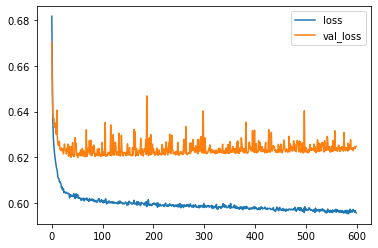

In [169]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [172]:
predictions = model.predict(X_test)

91/91 [==============================] - 0s 956us/step


In [174]:
predictions.round()

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [175]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62      1440
           1       0.64      0.71      0.67      1460

    accuracy                           0.65      2900
   macro avg       0.65      0.65      0.65      2900
weighted avg       0.65      0.65      0.65      2900



In [176]:
from tensorflow.keras.callbacks import EarlyStopping

In [177]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [178]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
272/272 [==============================] - 1s 2ms/step - loss: 0.5959 - val_loss: 0.6228
Epoch 2/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5962 - val_loss: 0.6227
Epoch 3/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5965 - val_loss: 0.6244
Epoch 4/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5959 - val_loss: 0.6228
Epoch 5/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5952 - val_loss: 0.6273
Epoch 6/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5966 - val_loss: 0.6240
Epoch 7/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5957 - val_loss: 0.6271
Epoch 8/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5966 - val_loss: 0.6267
Epoch 9/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5956 - val_loss: 0.6234
Epoch 10/600
272/272 [==============================] - 0s 2ms/step - loss: 0.5964 - val_lo

<AxesSubplot:>

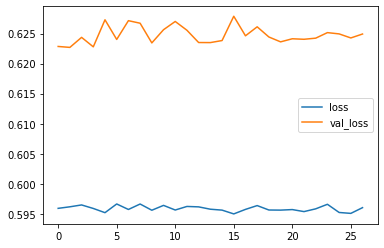

In [179]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [180]:
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62      1440
           1       0.64      0.71      0.67      1460

    accuracy                           0.65      2900
   macro avg       0.65      0.65      0.65      2900
weighted avg       0.65      0.65      0.65      2900



In [181]:
from tensorflow.keras.layers import Dropout

In [182]:
model = Sequential()
model.add(Dense(units=14,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=7,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


In [183]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
272/272 [==============================] - 1s 2ms/step - loss: 0.7012 - val_loss: 0.6923
Epoch 2/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6924 - val_loss: 0.6907
Epoch 3/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6891 - val_loss: 0.6865
Epoch 4/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6867 - val_loss: 0.6835
Epoch 5/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6837 - val_loss: 0.6805
Epoch 6/600
272/272 [==============================] - 1s 2ms/step - loss: 0.6826 - val_loss: 0.6781
Epoch 7/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6795 - val_loss: 0.6755
Epoch 8/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6770 - val_loss: 0.6730
Epoch 9/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6699 - val_loss: 0.6658
Epoch 10/600
272/272 [==============================] - 0s 2ms/step - loss: 0.6691 - val_lo

<AxesSubplot:>

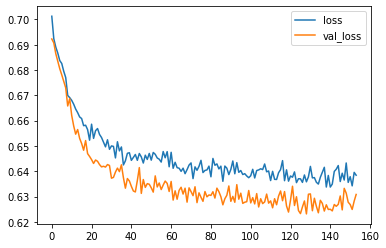

In [184]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [185]:
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62      1440
           1       0.64      0.71      0.67      1460

    accuracy                           0.65      2900
   macro avg       0.65      0.65      0.65      2900
weighted avg       0.65      0.65      0.65      2900



In [187]:
# Try XGboost on this data!!

# Why is the classification report data not changing after Early Stopping + Drop out Layers?

# See about excluding home court (binary variable) from normalization (does that change anything?)

# Incorp Opp stats in final feature set

In [ ]:
# should I normalize the stats before of after subtracting team stats? (I probably should normalize after)
# can maybe cut out pf since that's similar to fta

In [ ]:
#games_per_year = {
#2014: 83, 
#2015: 83,
#…. }


#For year, games in games_per_year.items():
#      Df = df.when(date=year).iloc[:games]
#      df_1 = df.when(date=year).iloc[games:-1]

In [ ]:
#should a normalize before or after taking the difference of the team/g stats? Will normalize after for now